# SBEN454-Data Mining - Final Project
## By: 
* Saadeldin Mostafa          ID: 1162100
* Yara Wael Mohamed          ID: 1170431
* Youssef Sherif Sayed       ID: 1170040

# Imports and Reading data

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import operator

from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn import svm

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import BorderlineSMOTE

pd.options.mode.chained_assignment = None  # default='warn'

In [175]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.fillna(0)
X = diabetes.to_numpy()

feature_names = diabetes.columns[:8]

In [176]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Visualization


## Boxplot

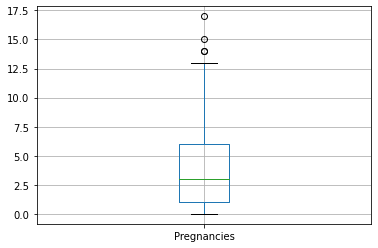

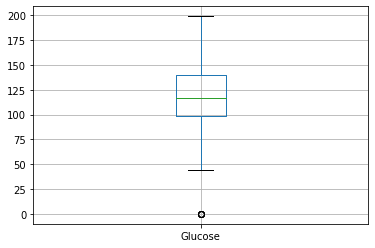

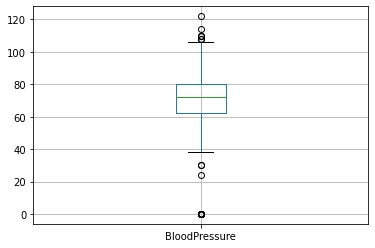

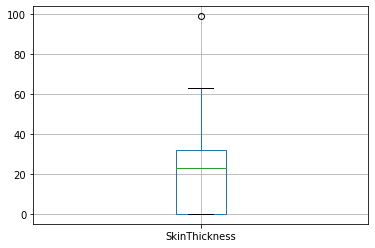

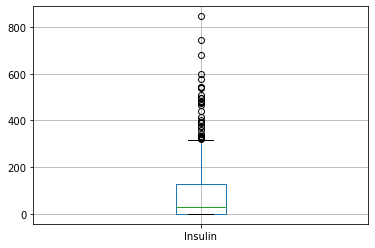

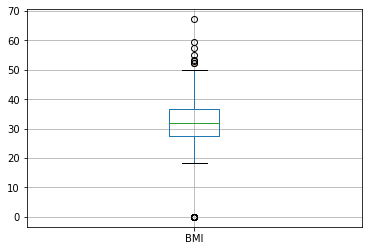

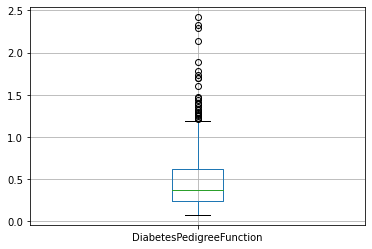

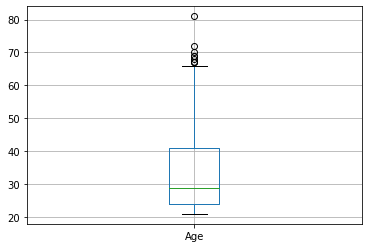

In [177]:
for i in ["Pregnancies"	, "Glucose"	, "BloodPressure",	"SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]:
    plt.figure()
    diabetes[i].plot.box(grid='True')


## Outlier Counts

In [178]:
print("Count of Outliers: ")
Q1 = diabetes.quantile(0.25)
Q3 = diabetes.quantile(0.75)
IQR = Q3 - Q1
((diabetes < (Q1 - 1.5 * IQR)) | (diabetes > (Q3 + 1.5 * IQR))).sum()

Count of Outliers: 


Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

## Histogram

<Figure size 1152x576 with 0 Axes>

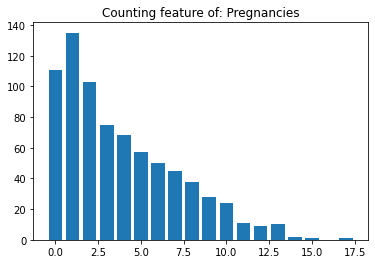

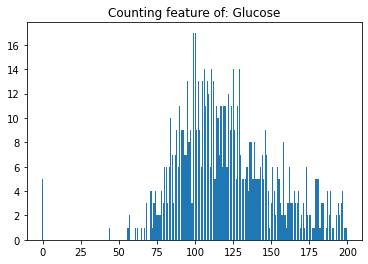

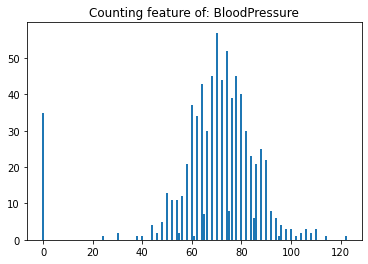

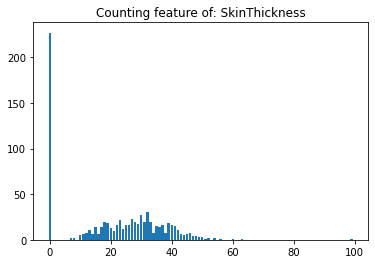

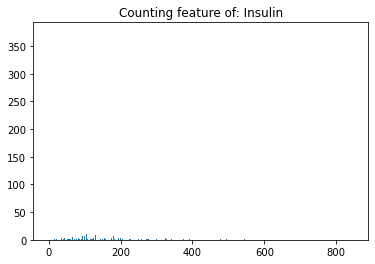

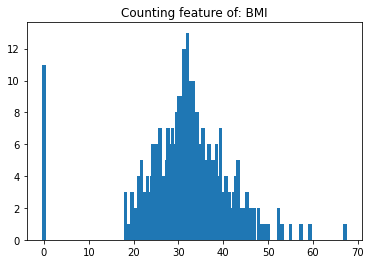

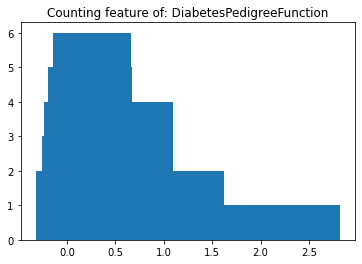

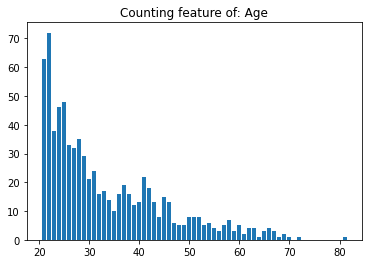

In [179]:
plt.figure(figsize = (16,8))
for i in range(8):
    unique, counts = np.unique(X[:,i], return_counts=True)
    plt.figure()
    plt.bar(unique,counts)
    plt.title("Counting feature of: {}".format(diabetes.columns[i]))


## Zeros in Features

In [180]:
# How many zeroes do we have in each feature?
for feature in diabetes.columns[:8]:
    print('Number of 0 rows for "{field_name}" feature: {amount}'.format(
        field_name=feature,
        amount=np.count_nonzero(diabetes[feature] == 0)
    ))

Number of 0 rows for "Pregnancies" feature: 111
Number of 0 rows for "Glucose" feature: 5
Number of 0 rows for "BloodPressure" feature: 35
Number of 0 rows for "SkinThickness" feature: 227
Number of 0 rows for "Insulin" feature: 374
Number of 0 rows for "BMI" feature: 11
Number of 0 rows for "DiabetesPedigreeFunction" feature: 0
Number of 0 rows for "Age" feature: 0


Text(0.5, 1.0, 'Counting feature of: Insulin')

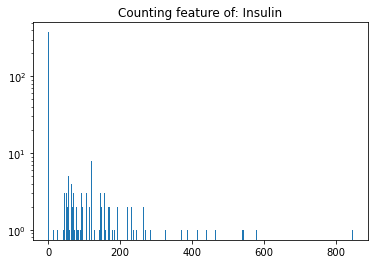

In [182]:
unique, counts = np.unique(X[:,4], return_counts=True)
plt.figure()
plt.bar(unique,counts,log=True)
plt.title("Counting feature of: {}".format(diabetes.columns[4]))

## Correlation Heatmap

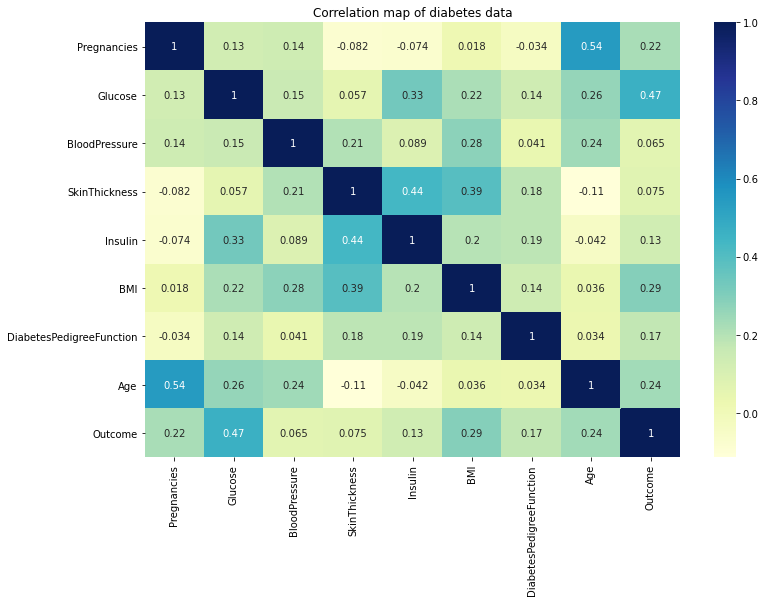

In [79]:
# Correlation map of each feature with another in a pair-wise relation
sns.heatmap(diabetes.corr(),annot=True, cmap = 'YlGnBu')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.title("Correlation map of diabetes data")
plt.show()

# Preprocessing


In [81]:
# Display how many 0 value each feature have , 0 counts as missing values except in pregnancies
for feature in diabetes.columns[:8]:
    print('Number of 0 rows for "{field_name}" feature: {amount}'.format(
        field_name=feature,
        amount=np.count_nonzero(diabetes[feature] == 0)
    ))

# We can conclude from this that we can afford to remove the rows that have zeros from Glucose,Blood Pressure, BMI

Number of 0 rows for "Pregnancies" feature: 111
Number of 0 rows for "Glucose" feature: 5
Number of 0 rows for "BloodPressure" feature: 35
Number of 0 rows for "SkinThickness" feature: 227
Number of 0 rows for "Insulin" feature: 374
Number of 0 rows for "BMI" feature: 11
Number of 0 rows for "DiabetesPedigreeFunction" feature: 0
Number of 0 rows for "Age" feature: 0


In [82]:
# Imbalance between 2 classes detected
print("Class 0 count = {}".format(diabetes["Outcome"][diabetes["Outcome"] == 0].count()))
print("Class 1 count = {}".format(diabetes["Outcome"][diabetes["Outcome"] == 1].count()))

Class 0 count = 500
Class 1 count = 268


In [83]:
# Replacing 0s with mean, did not affect result much, only by 1-2%

#columns_to_update = ['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI']

#for feature in columns_to_update:
#    diabetes[feature] = diabetes[feature].replace(to_replace = 0 , value = diabetes[feature].mean() )
#X = diabetes.to_numpy()

# Doesnt affect accuracy much

In [84]:
# Removing the zero rows from selected features that we can afford to drop rows in : [ Glucose , BMI , Blood pressure]
diabetes_dropped = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
diabetes_dropped.shape

(724, 9)

In [85]:
# Imbalance between 2 classes still detected
print("Class 0 count = {}".format(diabetes_dropped["Outcome"][diabetes_dropped["Outcome"] == 0].count()))
print("Class 1 count = {}".format(diabetes_dropped["Outcome"][diabetes_dropped["Outcome"] == 1].count()))

Class 0 count = 475
Class 1 count = 249


In [205]:
# Normalizing Data with dropped useless rows
scaler = MinMaxScaler()
for feature in diabetes_dropped.columns:
    diabetes_dropped[[feature]] = scaler.fit_transform(diabetes_dropped[[feature]])

X = diabetes_dropped.drop(columns=["Outcome"]).to_numpy()
y = diabetes_dropped["Outcome"].to_numpy()

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) # 20% Test

In [87]:
diabetes_dropped

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.353535,0.000000,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.292929,0.000000,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.000000,0.000000,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.232323,0.111111,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.353535,0.198582,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.484848,0.212766,0.300613,0.039710,0.700000,0.0
764,0.117647,0.503226,0.469388,0.272727,0.000000,0.380368,0.111870,0.100000,0.0
765,0.294118,0.496774,0.489796,0.232323,0.132388,0.163599,0.071307,0.150000,0.0
766,0.058824,0.529032,0.367347,0.000000,0.000000,0.243354,0.115713,0.433333,1.0


## Trying to find the best model and testing each

### SVM

In [206]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) # 20% Test


In [147]:
#param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}

#grid = GridSearchCV(svm.SVC(),param_grid,refit=True)
#grid.fit(X_train,y_train)
#print(grid.best_params_)

# Best results at this step were: C = 10 , gamma = 0.01, kernel = rbf

In [198]:
SVM_model = svm.SVC(C=10,gamma=0.01,kernel='rbf')
SVM_model.fit(X_train,y_train)
SVM_model_accuracy = SVM_model.score(X_test,y_test)
print("Accuracy is: {}".format(SVM_model_accuracy))

Accuracy is: 0.8068965517241379


Using RFECV to feature select along with Stratified K-fold

C:\Users\omars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


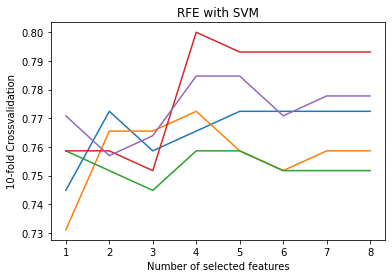

rfecv.grid_scores_: [[0.74482759 0.73103448 0.75862069 0.75862069 0.77083333]
 [0.77241379 0.76551724 0.75172414 0.75862069 0.75694444]
 [0.75862069 0.76551724 0.74482759 0.75172414 0.76388889]
 [0.76551724 0.77241379 0.75862069 0.8        0.78472222]
 [0.77241379 0.75862069 0.75862069 0.79310345 0.78472222]
 [0.77241379 0.75172414 0.75172414 0.79310345 0.77083333]
 [0.77241379 0.75862069 0.75172414 0.79310345 0.77777778]
 [0.77241379 0.75862069 0.75172414 0.79310345 0.77777778]]
rfecv.support_: [ True  True False False False  True  True False]

The most suitable features for prediction: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']


C:\Users\omars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


In [199]:
X = diabetes_dropped[feature_names]
y = diabetes_dropped.Outcome

strat_k_fold = StratifiedKFold(
    n_splits=5,
)

SVM_model = svm.SVC(kernel='linear')

rfecv = RFECV(
    estimator=SVM_model,
    step=1,
    cv=strat_k_fold,
    scoring='accuracy'
)
rfecv.fit(X, y)

plt.figure()
plt.title('RFE with SVM')
plt.xlabel('Number of selected features')
plt.ylabel('10-fold Crossvalidation')

# grid_scores_ returns a list of accuracy scores
# for each of the features selected
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

plt.show()

print('rfecv.grid_scores_: {grid_scores}'.format(grid_scores=rfecv.grid_scores_))

# support_ is another attribute to find out the features
# which contribute the most to predicting
new_features = list(filter(
    lambda x: x[1],
    zip(feature_names, rfecv.support_)
))

print('rfecv.support_: {support}'.format(support=rfecv.support_))

# Features are the most suitable for predicting the response class
new_features = list(map(operator.itemgetter(0), new_features))
print('\nThe most suitable features for prediction: {new_features}'.format(new_features=new_features))


In [218]:
# Taking the features as recommended by RFECV ( Pregnancies, Glucose, BMI , DiabetesPedigreeFunction)

X = diabetes_dropped[["Pregnancies","Glucose","BMI","DiabetesPedigreeFunction"]].to_numpy()
y = diabetes_dropped["Outcome"].to_numpy()

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) # 20% Test



In [219]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(svm.SVC(),param_grid,refit=True,cv = 10)
grid.fit(X_train,y_train)
print("Best score reached from GridSearch is: " , grid.best_score_)
print("Best Parameters: ", grid.best_estimator_)


Best score reached from GridSearch is:  0.7686630369026014
Best Parameters:  SVC(C=10, gamma=1, kernel='linear')


In [220]:
# Accuracy for c=10 and gamma=1 for liner model is the same as the one achieved on entire data with rbf model
SVM_model = svm.SVC(C=10,gamma=1,kernel='linear')
SVM_model.fit(X_train,y_train)
SVM_model_accuracy = SVM_model.score(X_test,y_test)
print("Accuracy is: {}".format(SVM_model_accuracy))

Accuracy is: 0.8


In [221]:
# Oversampling method, creates synthetic data based on the data outcome to make that is 50/50 distributed between the 2 outcomes
from imblearn.over_sampling import BorderlineSMOTE 
sm = BorderlineSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [222]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(svm.SVC(),param_grid,refit=True,cv = 10)
grid.fit(X_res,y_res)
print("Best score reached from GridSearch is: " , grid.best_score_)
print("Best Parameters: ", grid.best_estimator_)

Best score reached from GridSearch is:  0.7371351351351351
Best Parameters:  SVC(C=0.1, gamma=1)


In [223]:
# Oversampling made the accuracy better from 0.8 to 0.82
SVM_model = svm.SVC(C=0.1,gamma=1,kernel='rbf')
SVM_model.fit(X_train,y_train)
SVM_model_accuracy = SVM_model.score(X_test,y_test)
print("Accuracy is: {}".format(SVM_model_accuracy))
print('Classification report:\n\n', classification_report(y_test, SVM_model.predict(X_test)))
print('Training set score: {:.2f}%'.format(SVM_model.score(X_train, y_train) * 100))
print('Testing set score: {:.2f}%'.format(SVM_model.score(X_test, y_test) * 100))

Accuracy is: 0.8206896551724138
Classification report:

               precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       102
         1.0       0.74      0.60      0.67        43

    accuracy                           0.82       145
   macro avg       0.79      0.76      0.77       145
weighted avg       0.82      0.82      0.81       145

Training set score: 76.68%
Testing set score: 82.07%


### Decision Tree

In [224]:
X = diabetes_dropped.drop(columns=["Outcome"]).to_numpy()
y = diabetes_dropped["Outcome"].to_numpy()

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) # 20% Test

In [58]:
from sklearn import tree
max_depths = [ ]
accuracies = [ ]
for i in range(1,21):
    Tree_model = tree.DecisionTreeClassifier(random_state= 42 , max_depth = i,criterion='entropy')
    Tree_model.fit(X_train,y_train)
    max_depths.append(i)
    accuracies.append(Tree_model.score(X_test,y_test))

print("Best accuracy: max depth of tree is {} and its accuracy is {}".format(max_depths[accuracies.index(max(accuracies))] , max(accuracies)))

Tree_model = tree.DecisionTreeClassifier(random_state= 42 , max_depth = max_depths[accuracies.index(max(accuracies))],criterion='entropy')
Tree_model.fit(X_train,y_train)
Tree_model_predict = Tree_model.predict(X_test)
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, Tree_model_predict) * 100))
print('Classification report:\n\n', classification_report(y_test, Tree_model_predict))
print('Training set score: {:.2f}%'.format(Tree_model.score(X_train, y_train) * 100))
print('Testing set score: {:.2f}%'.format(Tree_model.score(X_test, y_test) * 100))

Best accuracy: max depth of tree is 6 and its accuracy is 0.8344827586206897
Accuracy: 83.45%
Classification report:

               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       102
         1.0       0.72      0.72      0.72        43

    accuracy                           0.83       145
   macro avg       0.80      0.80      0.80       145
weighted avg       0.83      0.83      0.83       145

Training set score: 85.32%
Testing set score: 83.45%


In [59]:
from imblearn.over_sampling import BorderlineSMOTE 
sm = BorderlineSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [60]:
np.unique(y_res,return_counts=True)

(array([0., 1.]), array([373, 373], dtype=int64))

In [61]:
from sklearn import tree
max_depths = [ ]
accuracies = [ ]
for i in range(1,21):
    Tree_model = tree.DecisionTreeClassifier(random_state= 42 , max_depth = i,criterion='entropy')
    Tree_model.fit(X_res,y_res)
    max_depths.append(i)
    accuracies.append(Tree_model.score(X_test,y_test))

print("Best accuracy: max depth of tree is {} and its accuracy is {}".format(max_depths[accuracies.index(max(accuracies))] , max(accuracies)))

Tree_model = tree.DecisionTreeClassifier(random_state= 42 , max_depth = max_depths[accuracies.index(max(accuracies))],criterion='entropy')
Tree_model.fit(X_res,y_res)
Tree_model_predict = Tree_model.predict(X_test)
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, Tree_model_predict) * 100))
print('Classification report:\n\n', classification_report(y_test, Tree_model_predict))
print('Training set score: {:.2f}%'.format(Tree_model.score(X_res, y_res) * 100))
print('Testing set score: {:.2f}%'.format(Tree_model.score(X_test, y_test) * 100))

Best accuracy: max depth of tree is 10 and its accuracy is 0.7517241379310344
Accuracy: 75.17%
Classification report:

               precision    recall  f1-score   support

         0.0       0.88      0.75      0.81       102
         1.0       0.56      0.74      0.64        43

    accuracy                           0.75       145
   macro avg       0.72      0.75      0.73       145
weighted avg       0.78      0.75      0.76       145

Training set score: 97.72%
Testing set score: 75.17%


C:\Users\omars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


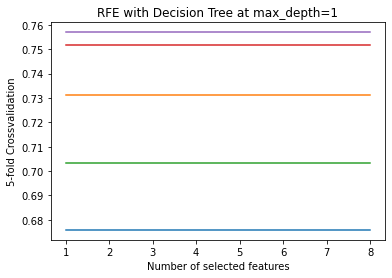

C:\Users\omars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
C:\Users\omars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


rfecv.grid_scores_: [[0.67586207 0.73103448 0.70344828 0.75172414 0.75694444]
 [0.67586207 0.73103448 0.70344828 0.75172414 0.75694444]
 [0.67586207 0.73103448 0.70344828 0.75172414 0.75694444]
 [0.67586207 0.73103448 0.70344828 0.75172414 0.75694444]
 [0.67586207 0.73103448 0.70344828 0.75172414 0.75694444]
 [0.67586207 0.73103448 0.70344828 0.75172414 0.75694444]
 [0.67586207 0.73103448 0.70344828 0.75172414 0.75694444]
 [0.67586207 0.73103448 0.70344828 0.75172414 0.75694444]]
rfecv.support_: [False  True False False False False False False]

The most suitable features for prediction: ['Glucose']


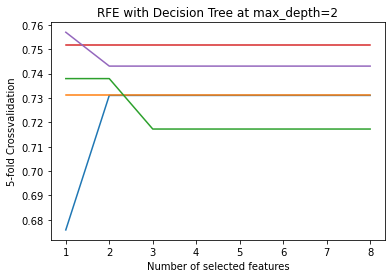

C:\Users\omars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
C:\Users\omars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


rfecv.grid_scores_: [[0.67586207 0.73103448 0.73793103 0.75172414 0.75694444]
 [0.73103448 0.73103448 0.73793103 0.75172414 0.74305556]
 [0.73103448 0.73103448 0.71724138 0.75172414 0.74305556]
 [0.73103448 0.73103448 0.71724138 0.75172414 0.74305556]
 [0.73103448 0.73103448 0.71724138 0.75172414 0.74305556]
 [0.73103448 0.73103448 0.71724138 0.75172414 0.74305556]
 [0.73103448 0.73103448 0.71724138 0.75172414 0.74305556]
 [0.73103448 0.73103448 0.71724138 0.75172414 0.74305556]]
rfecv.support_: [False  True False False False  True False False]

The most suitable features for prediction: ['Glucose', 'BMI']


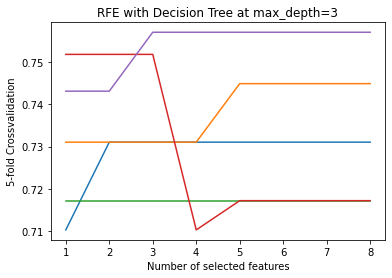

C:\Users\omars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
C:\Users\omars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


rfecv.grid_scores_: [[0.71034483 0.73103448 0.71724138 0.75172414 0.74305556]
 [0.73103448 0.73103448 0.71724138 0.75172414 0.74305556]
 [0.73103448 0.73103448 0.71724138 0.75172414 0.75694444]
 [0.73103448 0.73103448 0.71724138 0.71034483 0.75694444]
 [0.73103448 0.74482759 0.71724138 0.71724138 0.75694444]
 [0.73103448 0.74482759 0.71724138 0.71724138 0.75694444]
 [0.73103448 0.74482759 0.71724138 0.71724138 0.75694444]
 [0.73103448 0.74482759 0.71724138 0.71724138 0.75694444]]
rfecv.support_: [False  True False False False  True False  True]

The most suitable features for prediction: ['Glucose', 'BMI', 'Age']


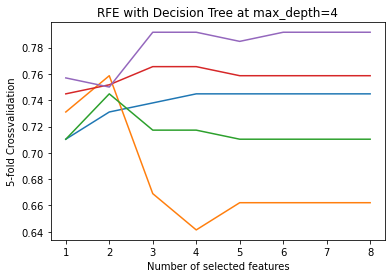

C:\Users\omars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
C:\Users\omars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


rfecv.grid_scores_: [[0.71034483 0.73103448 0.71034483 0.74482759 0.75694444]
 [0.73103448 0.75862069 0.74482759 0.75172414 0.75      ]
 [0.73793103 0.66896552 0.71724138 0.76551724 0.79166667]
 [0.74482759 0.64137931 0.71724138 0.76551724 0.79166667]
 [0.74482759 0.66206897 0.71034483 0.75862069 0.78472222]
 [0.74482759 0.66206897 0.71034483 0.75862069 0.79166667]
 [0.74482759 0.66206897 0.71034483 0.75862069 0.79166667]
 [0.74482759 0.66206897 0.71034483 0.75862069 0.79166667]]
rfecv.support_: [False  True False False False  True False False]

The most suitable features for prediction: ['Glucose', 'BMI']


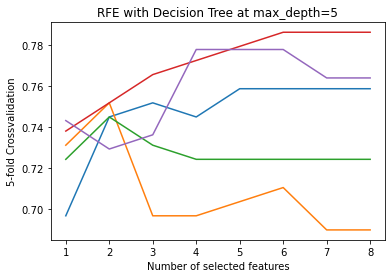

C:\Users\omars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
C:\Users\omars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


rfecv.grid_scores_: [[0.69655172 0.73103448 0.72413793 0.73793103 0.74305556]
 [0.74482759 0.75172414 0.74482759 0.75172414 0.72916667]
 [0.75172414 0.69655172 0.73103448 0.76551724 0.73611111]
 [0.74482759 0.69655172 0.72413793 0.77241379 0.77777778]
 [0.75862069 0.70344828 0.72413793 0.77931034 0.77777778]
 [0.75862069 0.71034483 0.72413793 0.7862069  0.77777778]
 [0.75862069 0.68965517 0.72413793 0.7862069  0.76388889]
 [0.75862069 0.68965517 0.72413793 0.7862069  0.76388889]]
rfecv.support_: [ True  True False  True False  True  True  True]

The most suitable features for prediction: ['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']


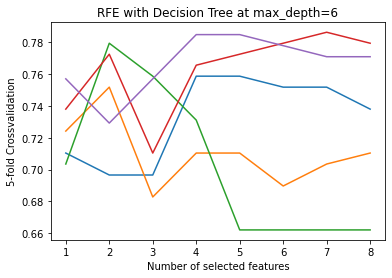

C:\Users\omars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
C:\Users\omars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


rfecv.grid_scores_: [[0.71034483 0.72413793 0.70344828 0.73793103 0.75694444]
 [0.69655172 0.75172414 0.77931034 0.77241379 0.72916667]
 [0.69655172 0.68275862 0.75862069 0.71034483 0.75694444]
 [0.75862069 0.71034483 0.73103448 0.76551724 0.78472222]
 [0.75862069 0.71034483 0.66206897 0.77241379 0.78472222]
 [0.75172414 0.68965517 0.66206897 0.77931034 0.77777778]
 [0.75172414 0.70344828 0.66206897 0.7862069  0.77083333]
 [0.73793103 0.71034483 0.66206897 0.77931034 0.77083333]]
rfecv.support_: [False  True False False False  True  True  True]

The most suitable features for prediction: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


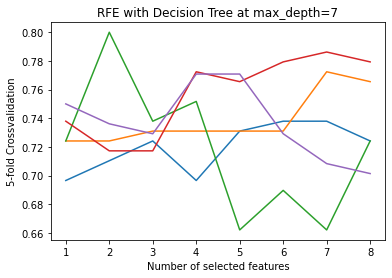

C:\Users\omars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


rfecv.grid_scores_: [[0.69655172 0.72413793 0.72413793 0.73793103 0.75      ]
 [0.71034483 0.72413793 0.8        0.71724138 0.73611111]
 [0.72413793 0.73103448 0.73793103 0.71724138 0.72916667]
 [0.69655172 0.73103448 0.75172414 0.77241379 0.77083333]
 [0.73103448 0.73103448 0.66206897 0.76551724 0.77083333]
 [0.73793103 0.73103448 0.68965517 0.77931034 0.72916667]
 [0.73793103 0.77241379 0.66206897 0.7862069  0.70833333]
 [0.72413793 0.76551724 0.72413793 0.77931034 0.70138889]]
rfecv.support_: [False  True False False False  True  True  True]

The most suitable features for prediction: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


C:\Users\omars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


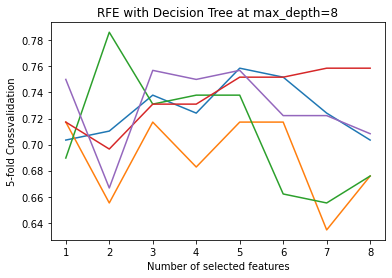

rfecv.grid_scores_: [[0.70344828 0.71724138 0.68965517 0.71724138 0.75      ]
 [0.71034483 0.65517241 0.7862069  0.69655172 0.66666667]
 [0.73793103 0.71724138 0.73103448 0.73103448 0.75694444]
 [0.72413793 0.68275862 0.73793103 0.73103448 0.75      ]
 [0.75862069 0.71724138 0.73793103 0.75172414 0.75694444]
 [0.75172414 0.71724138 0.66206897 0.75172414 0.72222222]
 [0.72413793 0.63448276 0.65517241 0.75862069 0.72222222]
 [0.70344828 0.67586207 0.67586207 0.75862069 0.70833333]]
rfecv.support_: [ True  True False False False  True  True  True]

The most suitable features for prediction: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


C:\Users\omars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


In [64]:
for i in range(1,9):
    X = diabetes_dropped[feature_names]
    y = diabetes_dropped.Outcome

    strat_k_fold = StratifiedKFold(
        n_splits=5,
    )

    Tree_model = tree.DecisionTreeClassifier(random_state = 42, max_depth = i,criterion='entropy')

    rfecv = RFECV(
        estimator=Tree_model,
        step=1,
        cv=strat_k_fold,
        scoring='accuracy'
    )
    rfecv.fit(X, y)

    plt.figure()
    plt.title('RFE with Decision Tree at max_depth={}'.format(i))
    plt.xlabel('Number of selected features')
    plt.ylabel('5-fold Crossvalidation')

    # grid_scores_ returns a list of accuracy scores
    # for each of the features selected
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

    plt.show()

    print('rfecv.grid_scores_: {grid_scores}'.format(grid_scores=rfecv.grid_scores_))

    # support_ is another attribute to find out the features
    # which contribute the most to predicting
    new_features = list(filter(
        lambda x: x[1],
        zip(feature_names, rfecv.support_)
    ))

    print('rfecv.support_: {support}'.format(support=rfecv.support_))

    # Features are the most suitable for predicting the response class
    new_features = list(map(operator.itemgetter(0), new_features))
    print('\nThe most suitable features for prediction: {new_features}'.format(new_features=new_features))


In [65]:
diabetes_tree_bestfeatures = diabetes_dropped[['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']]
X = diabetes_tree_bestfeatures.drop(columns=['Outcome']).to_numpy()
y = diabetes_dropped["Outcome"].to_numpy()

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) # 20% Test

In [66]:
max_depths = [ ]
accuracies = [ ]
for i in range(1,21):
    Tree_model = tree.DecisionTreeClassifier(random_state= 42 , max_depth = i,criterion='entropy')
    Tree_model.fit(X_train,y_train)
    max_depths.append(i)
    accuracies.append(Tree_model.score(X_test,y_test))

print("Best accuracy: max depth of tree is {} and its accuracy is {}".format(max_depths[accuracies.index(max(accuracies))] , max(accuracies)))

Best accuracy: max depth of tree is 6 and its accuracy is 0.8206896551724138


In [231]:
# Testing Gridsearch with SMOTE oversampling
from imblearn.over_sampling import BorderlineSMOTE 
sm = BorderlineSMOTE(random_state=42)
X = diabetes_dropped.drop(columns=["Outcome"]).to_numpy()
y = diabetes_dropped["Outcome"].to_numpy()
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) # 20% Test

X_res, y_res = sm.fit_resample(X_train, y_train)

Tree_model = tree.DecisionTreeClassifier(max_depth = 6 , random_state=42)


# Create the parameter grid based on the results of random search
params = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'min_samples_leaf': [5,6,7,8,9,10,15,20,25,30,50,100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=Tree_model,
                           param_grid=params,
                           cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_res, y_res)

print("best parameters are: " , grid_search.best_estimator_)
print("best score is: " , grid_search.best_score_)

Tree_model = tree.DecisionTreeClassifier(max_depth = 8, min_samples_leaf=9,random_state=42)
Tree_model.fit(X_train,y_train)
print("Accuracy on test data is: {}".format(Tree_model.score(X_test,y_test)))

best parameters are:  DecisionTreeClassifier(max_depth=8, min_samples_leaf=9, random_state=42)
best score is:  0.7480447427293064
Accuracy on test data is: 0.8068965517241379


### Logistic Regression Model

In [232]:
X = diabetes_dropped.drop(columns=["Outcome"]).to_numpy()
y = diabetes_dropped["Outcome"].to_numpy()
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) # 20% Test

In [237]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_reg_predict = log_reg.score(X_train,y_train)
print("Accuracy = {}".format(log_reg_predict))

Accuracy = 0.768566493955095


C:\Users\omars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


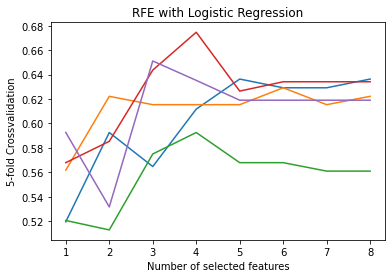

rfecv.grid_scores_: [[0.51948052 0.56179775 0.52054795 0.56790123 0.59259259]
 [0.59259259 0.62222222 0.51282051 0.58536585 0.53164557]
 [0.56470588 0.61538462 0.575      0.64367816 0.65116279]
 [0.61176471 0.61538462 0.59259259 0.6746988  0.63529412]
 [0.63636364 0.61538462 0.56790123 0.62650602 0.61904762]
 [0.62921348 0.62921348 0.56790123 0.63414634 0.61904762]
 [0.62921348 0.61538462 0.56097561 0.63414634 0.61904762]
 [0.63636364 0.62222222 0.56097561 0.63414634 0.61904762]]
rfecv.support_: [ True  True False False False  True  True False]

The most suitable features for prediction: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']


C:\Users\omars\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


In [238]:
from sklearn.linear_model import LogisticRegression

X = diabetes_dropped[feature_names]
y = diabetes_dropped.Outcome

strat_k_fold = StratifiedKFold(
    n_splits=5,
)

logreg_model = LogisticRegression()

rfecv = RFECV(
    estimator=logreg_model,
    step=1,
    cv=strat_k_fold,
    scoring='f1'
)
rfecv.fit(X, y)

plt.figure()
plt.title('RFE with Logistic Regression')
plt.xlabel('Number of selected features')
plt.ylabel('5-fold Crossvalidation')

# grid_scores_ returns a list of accuracy scores
# for each of the features selected
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

plt.show()

print('rfecv.grid_scores_: {grid_scores}'.format(grid_scores=rfecv.grid_scores_))

# support_ is another attribute to find out the features
# which contribute the most to predicting
new_features = list(filter(
    lambda x: x[1],
    zip(feature_names, rfecv.support_)
))

print('rfecv.support_: {support}'.format(support=rfecv.support_))

# Features are the most suitable for predicting the response class
new_features = list(map(operator.itemgetter(0), new_features))
print('\nThe most suitable features for prediction: {new_features}'.format(new_features=new_features))

In [253]:
X = diabetes_dropped[['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction','Outcome']]
X = X.drop(columns=["Outcome"]).to_numpy()
y = diabetes_dropped["Outcome"].to_numpy()
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) # 20% Test

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_reg_predict = log_reg.score(X_train,y_train)
print("Accuracy = {}".format(log_reg_predict))

Accuracy = 0.7668393782383419


In [240]:
from sklearn.model_selection import GridSearchCV

c_values = [0.1,1,2,3,4,5,6,7,8,9,10,100]

param_grid = [
    {
        'C': c_values,
        'penalty': ['l1'],
        'solver': ['liblinear'],
        'multi_class': ['ovr'],
        'random_state': [42]
    },
    {
        'C': c_values,
        'penalty': ['l2'],
        'solver': ['liblinear', 'newton-cg', 'lbfgs'],
        'multi_class': ['ovr'],
        'random_state': [42]
    }
]

grid = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=strat_k_fold,
    scoring='f1'
)
grid.fit(X_train, y_train)

# Best LogisticRegression parameters
print(grid.best_params_)

{'C': 8, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg'}
Best score: 63.22%


In [258]:
log_reg = LogisticRegression(
    # Parameters chosen based on GridSearchCV result
    C=8,
    multi_class='ovr',
    penalty='l2',
    solver='newton-cg',
    random_state=42
)
log_reg.fit(X_train, y_train)

log_reg_predict = log_reg.predict(X_test)
log_reg_predict_proba = log_reg.predict_proba(X_test)[:, 1]

In [259]:
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, log_reg_predict) * 100))
print('Classification report:\n\n', classification_report(y_test, log_reg_predict))
print('Training set score: {:.2f}%'.format(log_reg.score(X_train, y_train) * 100))
print('Testing set score: {:.2f}%'.format(log_reg.score(X_test, y_test) * 100))

Accuracy: 79.31%
Classification report:

               precision    recall  f1-score   support

         0.0       0.85      0.86      0.85       102
         1.0       0.66      0.63      0.64        43

    accuracy                           0.79       145
   macro avg       0.75      0.75      0.75       145
weighted avg       0.79      0.79      0.79       145

Training set score: 77.03%
Testing set score: 79.31%


In [254]:
from imblearn.over_sampling import BorderlineSMOTE 
sm = BorderlineSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

param_grid = [
    {
        'C': c_values,
        'penalty': ['l1'],
        'solver': ['liblinear'],
        'multi_class': ['ovr'],
        'random_state': [42]
    },
    {
        'C': c_values,
        'penalty': ['l2'],
        'solver': ['liblinear', 'newton-cg', 'lbfgs'],
        'multi_class': ['ovr'],
        'random_state': [42]
    }
]

grid = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=strat_k_fold,
    scoring='f1'
)
grid.fit(X_res, y_res)

# Best LogisticRegression parameters
print(grid.best_params_)
# Best score for LogisticRegression with best parameters
print('Best score: {:.2f}%'.format(grid.best_score_ * 100))

{'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
Best score: 75.41%


In [255]:
log_reg = LogisticRegression(
    # Parameters chosen based on GridSearchCV result
    C=0.1,
    multi_class='ovr',
    penalty='l2',
    solver='liblinear',
    random_state=42
)
log_reg.fit(X_train, y_train)
log_reg_predict = log_reg.predict(X_test)

In [256]:
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, log_reg_predict) * 100))
print('Classification report:\n\n', classification_report(y_test, log_reg_predict))
print('Training set score: {:.2f}%'.format(log_reg.score(X_train, y_train) * 100))
print('Testing set score: {:.2f}%'.format(log_reg.score(X_test, y_test) * 100))

Accuracy: 76.55%
Classification report:

               precision    recall  f1-score   support

         0.0       0.76      0.98      0.85       102
         1.0       0.85      0.26      0.39        43

    accuracy                           0.77       145
   macro avg       0.80      0.62      0.62       145
weighted avg       0.78      0.77      0.72       145

Training set score: 70.29%
Testing set score: 76.55%
